In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

,label,sizes,total-size::in,size:::,size-stats::in::std,min
0,0,"[156, -100, 104, 104, -136, -120, 1432, -1432,...",498428,498428,632.805751,-1432
1,0,"[156, -100, 104, 104, -120, -136, 1432, -1432,...",500700,500700,635.172147,-1432
2,0,"[156, -100, 104, 104, -120, -136, 1432, -1432,...",497620,497620,634.345012,-1432
3,0,"[104, 104, -136, -120, 1432, -1432, -1432, -14...",498936,498936,634.184673,-1432
4,0,"[156, -100, 104, 104, -120, -136, 1432, -1432,...",499844,499844,632.664241,-1432
...,...,...,...,...,...,...
495,9,"[156, -100, 104, 104, -168, -136, 1432, 1432, ...",28155900,28155900,460.227459,-1272
496,9,"[156, -100, 104, 104, -136, -168, 1432, 1432, ...",27829252,27829252,478.043421,-1272
497,9,"[156, -100, 104, 104, -168, -136, 1432, 1432, ...",28043660,28043660,465.309445,-1272
498,9,"[156, -100, 104, 104, -136, -168, 1432, 1432, ...",28742852,28742852,470.949180,-1272


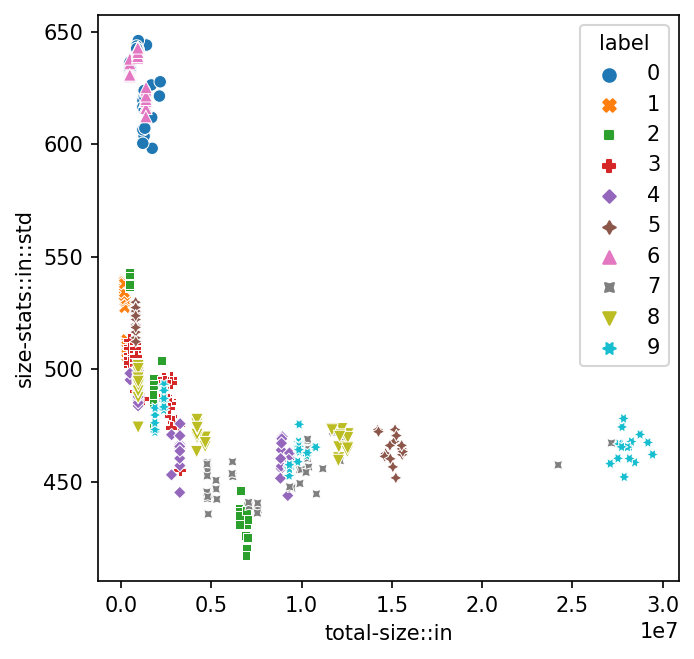

In [2]:
def scatterplot(filename):
    with h5py.File(filename) as h5in:
    # with h5py.File("../../results-on-drive/ml-eval-conn/defence~tamaraw/dataset.h5") as h5in:
        frame = pd.DataFrame({
            "label": h5in["labels"]["class"][:],
            "sizes": h5in["sizes"][:]
        })

    frame

    def total_in(sizes):
        return np.abs(sizes[sizes < 0]).sum()

    def in_std(sizes):
        return np.std(np.abs(sizes[sizes < 0]))
    
    def max_in(sizes):
        return np.min(sizes)

    frame["total-size::in"] = frame["sizes"].apply(total_in)
    frame["size:::"] = frame["sizes"].apply(total_in)
    frame["size-stats::in::std"] = frame["sizes"].apply(in_std)
    frame["min"] = frame["sizes"].apply(max_in)
    display(frame)

    plot_data = frame[(frame["label"] >= 0) & (frame["label"] < 15)].copy()
    plot_data["label"] = plot_data["label"].astype(str)

    fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=150)
    sns.scatterplot(x="total-size::in", y="size-stats::in::std", data=plot_data, hue="label", style="label")
    return frame

frame = scatterplot("../../results/tamaraw-debug/higher_pkt_size/10x50+0/dataset.h5")

In [8]:
frame.groupby("label")["min"].min()

label
0   -1432
1   -1432
2   -1304
3   -1272
4   -1272
5   -1272
6   -1432
7   -1272
8   -1272
9   -1272
Name: min, dtype: int64

,label,sizes,total-size::in,size:::,size-stats::in::std,min
0,0,"[104, 104, -120, -136, 1432, -1432, 1272, -143...",392760,392760,580.169410,-1432
1,0,"[104, 104, 156, -100, 40, -136, -120, 1432, -1...",390900,390900,577.816435,-1432
2,0,"[104, 104, 156, -100, 40, -120, -136, 1432, -1...",395460,395460,583.178664,-1432
3,0,"[156, -100, 104, 104, -120, -136, 1432, 1432, ...",753236,753236,549.092401,-1432
4,0,"[156, -100, 104, 104, -120, -136, 1432, -1432,...",383748,383748,580.322120,-1432
...,...,...,...,...,...,...
495,9,"[156, -100, 104, 104, -136, -168, 1432, 1432, ...",22337500,22337500,490.485762,-1272
496,9,"[156, -100, 104, 104, -136, -168, 1432, 1432, ...",22835268,22835268,502.514040,-1272
497,9,"[156, -100, 104, 104, -168, -136, 1432, 1432, ...",23813932,23813932,497.751068,-1272
498,9,"[156, -100, 104, 104, -136, -168, 1432, 1432, ...",22991108,22991108,489.372590,-1272


,label,sizes,total-size::in,size:::,size-stats::in::std,min
0,0,"[104, 104, -120, -136, 1432, -1432, 1272, -143...",392760,392760,580.169410,-1432
1,0,"[104, 104, 156, -100, 40, -136, -120, 1432, -1...",390900,390900,577.816435,-1432
2,0,"[104, 104, 156, -100, 40, -120, -136, 1432, -1...",395460,395460,583.178664,-1432
3,0,"[156, -100, 104, 104, -120, -136, 1432, 1432, ...",753236,753236,549.092401,-1432
4,0,"[156, -100, 104, 104, -120, -136, 1432, -1432,...",383748,383748,580.322120,-1432
...,...,...,...,...,...,...
495,9,"[156, -100, 104, 104, -136, -168, 1432, 1432, ...",22337500,22337500,490.485762,-1272
496,9,"[156, -100, 104, 104, -136, -168, 1432, 1432, ...",22835268,22835268,502.514040,-1272
497,9,"[156, -100, 104, 104, -168, -136, 1432, 1432, ...",23813932,23813932,497.751068,-1272
498,9,"[156, -100, 104, 104, -136, -168, 1432, 1432, ...",22991108,22991108,489.372590,-1272


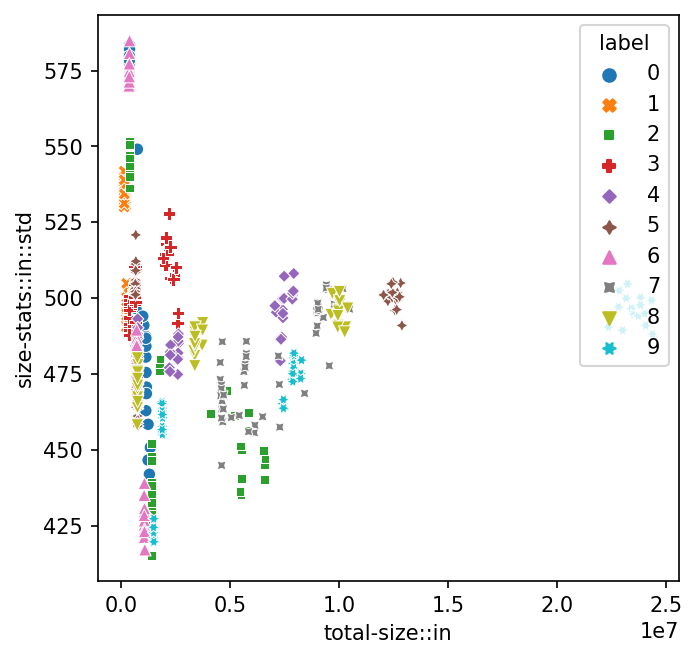

In [3]:
scatterplot("../../results/tamaraw-debug/noised_tamaraw-0.4/10x50+0/dataset.h5")

In [3]:
frame.groupby("label")["min"].min()

label
0   -1432
1   -1432
2   -1304
3   -1272
4   -1272
5   -1272
6   -1432
7   -1272
8   -1272
9   -1272
Name: min, dtype: int64

,label,sizes,total-size::in,size:::,size-stats::in::std,min
0,0,"[156, -100, 104, 104, -120, -136, 1432, -1432,...",426764,426764,598.793374,-1432
1,0,"[156, -100, 104, 104, -120, -136, 1432, -1432,...",427060,427060,598.796469,-1432
2,0,"[104, 104, 156, -100, 40, -120, -136, 1432, -1...",427204,427204,600.581780,-1432
3,0,"[104, 104, 156, -100, 40, -136, -120, 1432, -1...",426340,426340,598.955842,-1432
4,0,"[156, -100, 104, 104, -136, -120, 1432, -1432,...",426316,426316,599.659306,-1432
...,...,...,...,...,...,...
495,9,"[156, -100, 104, 104, -152, -136, 1432, 1432, ...",19720772,19720772,533.823189,-1272
496,9,"[156, -100, 104, 104, -136, -152, 1432, 1432, ...",20121764,20121764,536.211658,-1272
497,9,"[156, -100, 104, 104, -136, -152, 1432, 1432, ...",19342188,19342188,523.286446,-1272
498,9,"[156, -100, 104, 104, -136, -152, 1432, 1432, ...",21338612,21338612,543.059118,-1272


,label,sizes,total-size::in,size:::,size-stats::in::std,min
0,0,"[156, -100, 104, 104, -120, -136, 1432, -1432,...",426764,426764,598.793374,-1432
1,0,"[156, -100, 104, 104, -120, -136, 1432, -1432,...",427060,427060,598.796469,-1432
2,0,"[104, 104, 156, -100, 40, -120, -136, 1432, -1...",427204,427204,600.581780,-1432
3,0,"[104, 104, 156, -100, 40, -136, -120, 1432, -1...",426340,426340,598.955842,-1432
4,0,"[156, -100, 104, 104, -136, -120, 1432, -1432,...",426316,426316,599.659306,-1432
...,...,...,...,...,...,...
495,9,"[156, -100, 104, 104, -152, -136, 1432, 1432, ...",19720772,19720772,533.823189,-1272
496,9,"[156, -100, 104, 104, -136, -152, 1432, 1432, ...",20121764,20121764,536.211658,-1272
497,9,"[156, -100, 104, 104, -136, -152, 1432, 1432, ...",19342188,19342188,523.286446,-1272
498,9,"[156, -100, 104, 104, -136, -152, 1432, 1432, ...",21338612,21338612,543.059118,-1272


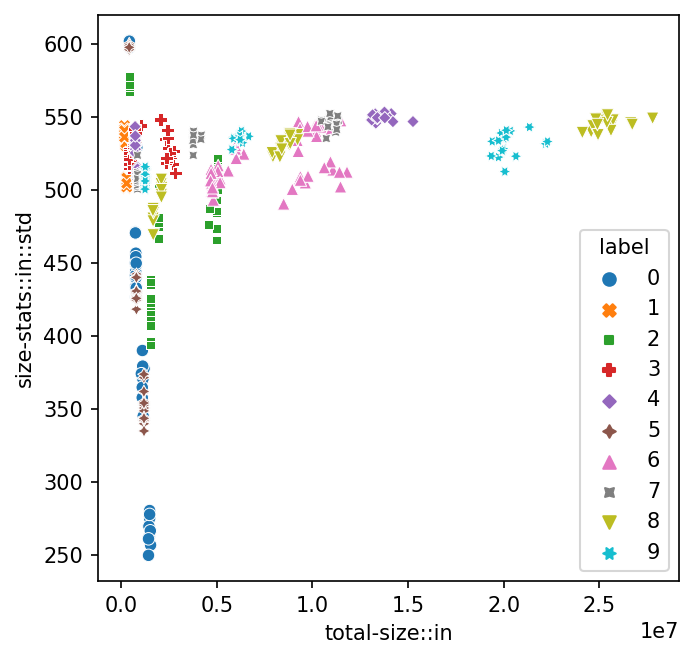

In [4]:
scatterplot("../../results/tamaraw-debug-10x50/msd-excess~1500/dataset.h5")

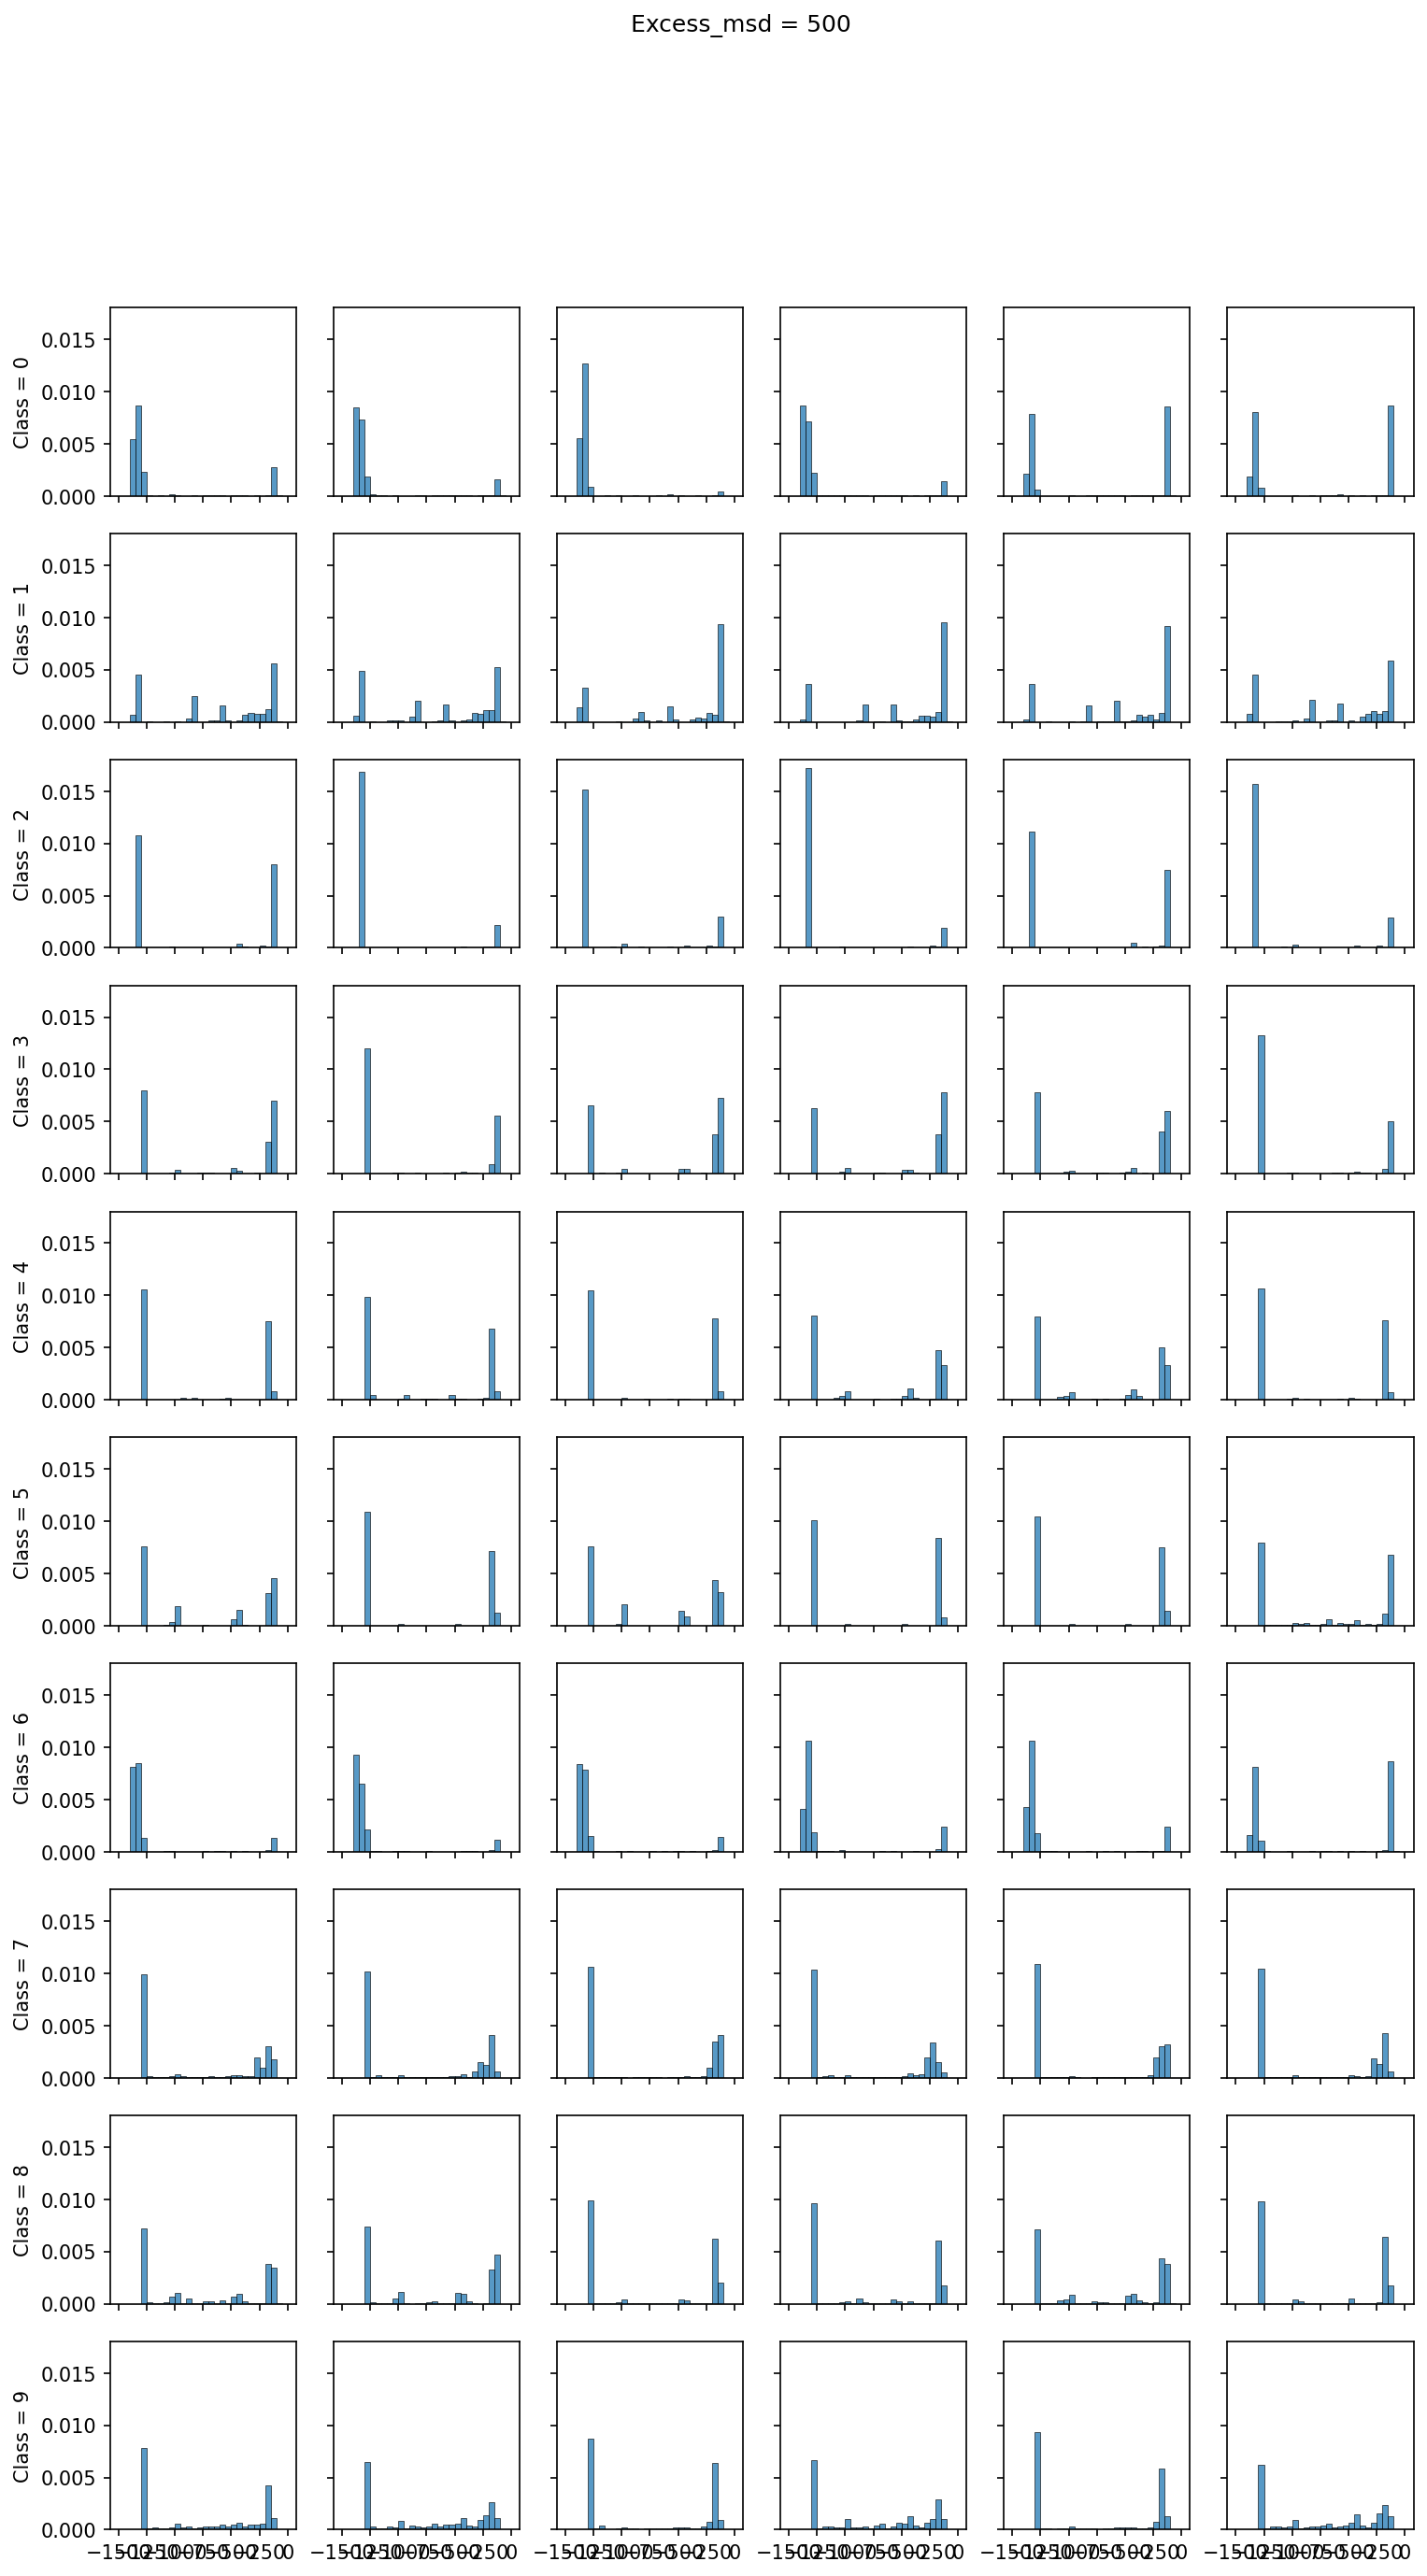

In [5]:
def plot_hist(excess, seed=0):
    with h5py.File(f"../../results/tamaraw-debug/max_udp_payload_size/10x50+0/dataset.h5") as h5in:
        frame = pd.DataFrame({
            "labels": np.asarray(h5in["labels"]["class"]),
            "sizes": np.asarray(h5in["sizes"])
        })
    plot_frame = frame.groupby("labels").sample(n=6, random_state=seed)

    fig, axes_grid = plt.subplots(10, 6, figsize=(12, 21), dpi=150, sharex=True, sharey=True)
    fig.suptitle(f"Excess_msd = {excess}")
    for row, (label, data) in enumerate(plot_frame.groupby("labels")):
        axes_row = axes_grid[row, :]
        axes_row[0].set_ylabel(f"Class = {label}")
        for size_data, ax in zip(data["sizes"], axes_row):
            ax.set_xticks(list(range(0, -1600, -250)))
            sns.histplot(size_data, binrange=(-1500, 0), bins=30, ax=ax, stat="density")

plot_hist(500, seed=1)
# for i, ax in zip([0, 100, 200, 300, 401, 500, 600, 700, 800, 900], axes):
#     sns.histplot(sizes[i], binrange=(-1500, 0), ax=ax,stat="density")
#     ax.set_title(i)

NameError: name 'axes_grid' is not defined

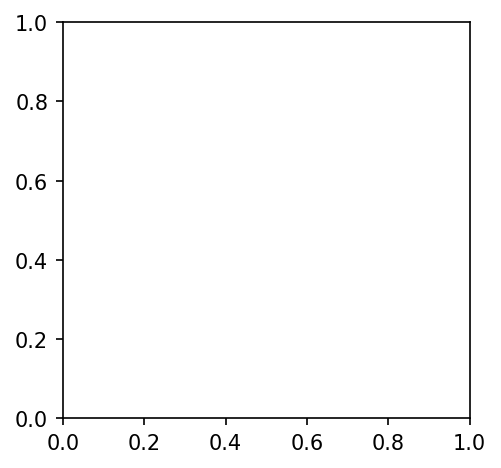

In [9]:
def plot_hist2(excess, seed=0):
    with h5py.File(f"../../results/tamaraw-debug-10x50/msd-excess~{excess}/dataset.h5") as h5in:
        frame = pd.DataFrame({
            "labels": np.asarray(h5in["labels"]["class"]),
            "sizes": np.asarray(h5in["sizes"])
        })
    plot_frame = frame.groupby("labels").sample(n=4, random_state=seed)

    fig, axes = plt.subplots(1, 1, figsize=(3.5, 3.5), dpi=150, sharex=True, sharey=True)
    for row, (label, data) in enumerate(plot_frame.groupby("labels")):
        axes_row = axes_grid[row, :]
        axes_row[0].set_ylabel(f"Class = {label}")
        for size_data, ax in zip(data["sizes"], axes_row):
            ax.set_xticks(list(range(0, -1600, -250)))
            sns.histplot(size_data, binrange=(-1500, 0), bins=30, ax=ax, stat="density")

plot_hist2(1500, seed=1)
# for i, ax in zip([0, 100, 200, 300, 401, 500, 600, 700, 800, 900], axes):
#     sns.histplot(sizes[i], binrange=(-1500, 0), ax=ax,stat="density")
#     ax.set_title(i)

In [ ]:
plot_hist(100, seed=3)

In [ ]:
plot_hist(1500, seed=2)